In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/
# updated by Finlay Macrae to use current Tensorflow syntax and Python 3
# Also adding in tensorboard

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [5]:
#Tensorboard setup
#set up the SummaryWriter which logs the progress
logs_path = '/tmp/tensorflow_logs/example/'



In [6]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [7]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [8]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [9]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
# Initializing the variables
init = tf.global_variables_initializer()


# Create a summary to monitor cost tensor
tf.summary.scalar("loss", cost)
tf.summary.histogram("Cost", cost)
# Create a summary to monitor accuracy tensor
#tf.summary.scalar("accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

Epoch: 0050 cost= 0.223107889 W= 0.463298 b= -0.735909
Epoch: 0100 cost= 0.206226483 W= 0.450588 b= -0.644475
Epoch: 0150 cost= 0.191294387 W= 0.438634 b= -0.558478
Epoch: 0200 cost= 0.178086698 W= 0.427391 b= -0.477597
Epoch: 0250 cost= 0.166404232 W= 0.416817 b= -0.401525
Epoch: 0300 cost= 0.156070843 W= 0.406871 b= -0.329978
Epoch: 0350 cost= 0.146930933 W= 0.397517 b= -0.262686
Epoch: 0400 cost= 0.138846666 W= 0.38872 b= -0.199396
Epoch: 0450 cost= 0.131696105 W= 0.380445 b= -0.13987
Epoch: 0500 cost= 0.125371531 W= 0.372663 b= -0.0838839
Epoch: 0550 cost= 0.119777523 W= 0.365343 b= -0.0312279
Epoch: 0600 cost= 0.114829734 W= 0.358459 b= 0.0182965
Epoch: 0650 cost= 0.110453583 W= 0.351984 b= 0.0648753
Epoch: 0700 cost= 0.106582992 W= 0.345895 b= 0.108684
Epoch: 0750 cost= 0.103159644 W= 0.340167 b= 0.149887
Epoch: 0800 cost= 0.100131862 W= 0.33478 b= 0.18864
Epoch: 0850 cost= 0.097453989 W= 0.329714 b= 0.225087
Epoch: 0900 cost= 0.095085606 W= 0.324949 b= 0.259367
Epoch: 0950 cost=

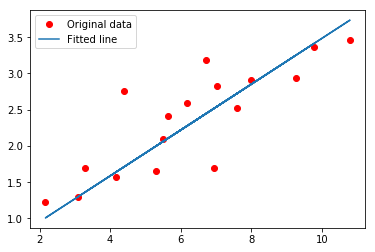

Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


In [15]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, sess.graph)
    tf.global_variables_initializer().run()


    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c, summary = sess.run([cost, merged_summary_op], feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
            #Write them to tensorboard too
            summary_writer.add_summary(summary, epoch)

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

In [ ]:
# Regression result